<p>This notebook contains the analysis of the Sharp IR 20-150cm sensor analog-to-digital output readings.
Readings were taken across a series of distances at 10cm intervals between 0 and 170cm where a white piece of paper served as the obstacle. Although the sensors are rated between 20-150cm, distances outside of this range were also tested to discover how the sensors would behave in real world use, where obstacles may appear outside of the rated range. A Regression approach is taken to predict the distance.  </p>

In [62]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [17]:
# read in data for Right IR Sensor
# values in the column headers equate to distance of the obstacle in front of the center in centimetres (cm)
rightIR_df = pd.read_csv("RightIRReadings.csv")
rightIR_df

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,6,533,512,396,309,242,202,172,145,143,116,112,96,95,78,79,38,70
1,23,556,513,395,343,240,197,171,179,175,150,117,101,106,81,96,50,65
2,3,543,506,393,319,240,204,171,148,140,123,108,103,104,82,111,67,67
3,3,523,513,390,288,240,203,172,138,120,127,109,98,92,87,72,71,67
4,6,522,506,394,289,243,231,173,136,128,122,114,95,116,84,83,71,73
5,4,533,518,394,292,243,206,176,132,118,143,104,122,79,80,95,74,85
6,3,525,514,412,302,245,247,180,147,138,124,115,98,86,97,75,64,60
7,3,554,516,393,302,242,205,197,132,128,131,127,107,111,84,64,71,69
8,3,519,516,421,298,243,223,176,147,128,124,119,100,88,87,69,70,63
9,7,520,544,390,299,243,192,176,138,145,127,92,104,72,97,53,80,55


In [18]:
# stats for readings at each distance
rightIR_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.740000,530.400000,516.930000,397.950000,303.170000,246.250000,201.550000,172.53000,150.540000,136.970000,124.970000,111.440000,102.560000,92.480000,83.590000,77.830000,69.840000,66.010000
std,6.780274,11.321741,11.601337,10.903966,9.433505,9.751845,9.356438,7.41205,8.797865,9.083735,9.830333,8.579186,9.608834,13.061997,12.650784,17.143515,16.007397,10.825984
min,0.000000,519.000000,505.000000,384.000000,288.000000,228.000000,184.000000,152.00000,132.000000,114.000000,100.000000,88.000000,72.000000,63.000000,48.000000,37.000000,32.000000,38.000000
25%,3.000000,522.000000,509.500000,390.000000,298.000000,240.000000,197.000000,170.00000,146.000000,134.000000,119.000000,107.000000,98.000000,87.000000,77.750000,69.000000,63.000000,62.750000
50%,3.000000,526.500000,513.000000,394.000000,302.000000,243.000000,200.000000,172.00000,149.000000,136.000000,124.000000,111.500000,101.000000,91.000000,82.000000,75.500000,69.500000,65.500000
75%,6.000000,532.250000,520.000000,401.000000,303.000000,245.250000,203.000000,175.00000,153.250000,141.000000,130.000000,115.250000,104.000000,98.250000,91.250000,83.000000,75.000000,71.000000
max,31.000000,558.000000,557.000000,440.000000,343.000000,279.000000,247.000000,197.00000,182.000000,175.000000,150.000000,135.000000,139.000000,138.000000,127.000000,127.000000,111.000000,95.000000


In [44]:
# average reading at each length
average_readings = rightIR_df.mean(axis=0)
# convert to list and remove 
average_readings = average_readings.tolist()
# list of distances
distances = range(0,180,10)

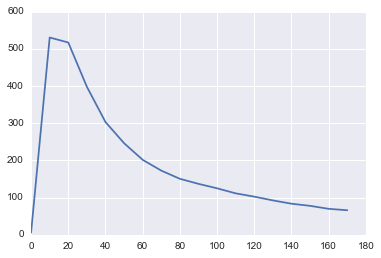

In [46]:
# plot of distances against A2D readings for comparison with manufacturers graph
plt.plot(distances, average_readings)

[20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]


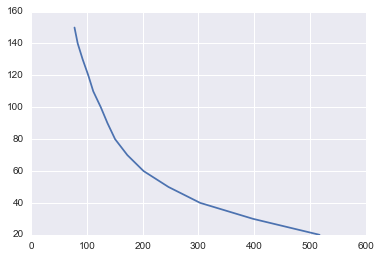

In [49]:
# distance is the unknown variable so we will not plot it on the Y axis and the A2D reading on the X axis
# to calculate a line of best fit the values for distances outside of the range 20-150cm have been excluded
average_readings = average_readings[2:16]
distances = distances[2:16]
print distances
plt.plot(average_readings, distances)

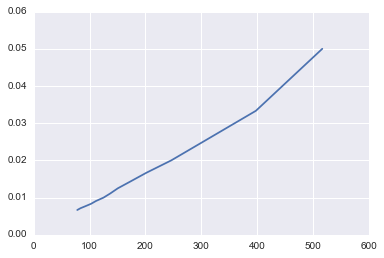

In [96]:
# This relationship is not linear 
# 1/distance plotted against A2D readings
inversed_distances = [pow(distance,-1) for distance in distances]
inversed_distances
plt.plot(average_readings, inversed_distances)

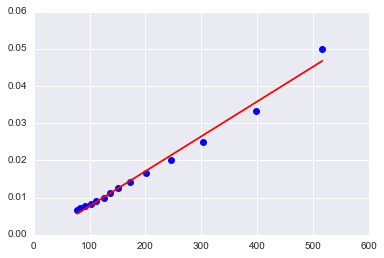

In [97]:
p1 = np.polyfit(average_readings, inversed_distances, 1)
plt.plot(average_readings,inversed_distances,'bo')
plt.plot(average_readings,np.polyval(p1,average_readings),'r')
slope,intercept,r_value,p_value,std_err = stats.linregress(average_readings,inversed_distances)


In [103]:
print "R value: ",r_value
print "Slope: ", slope
print "Intercept: ", intercept
print "P value: ", p_value
p1

R value:  0.999095929196
Slope:  5.63710645179e-05
Intercept:  0.00202946559052
P value:  7.86801463234e-18


array([  5.63710645e-05,   2.02946559e-03])

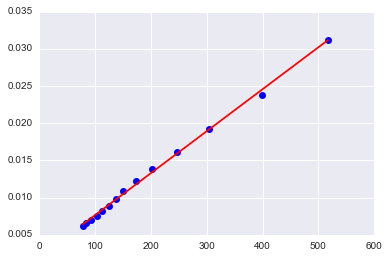

In [104]:
inversed_distances = [pow(distance+12,-1) for distance in distances]
p1 = np.polyfit(average_readings, inversed_distances, 1)
plt.plot(average_readings,inversed_distances,'bo')
plt.plot(average_readings,np.polyval(p1,average_readings),'r')
slope,intercept,r_value,p_value,std_err = stats.linregress(average_readings,inversed_distances)




In [105]:
print "R value: ",r_value
print "Slope: ", slope
print "Intercept: ", intercept
print "P value: ", p_value
p1


R value:  0.999095929196
Slope:  5.63710645179e-05
Intercept:  0.00202946559052
P value:  7.86801463234e-18


array([  5.63710645e-05,   2.02946559e-03])

In [106]:
# equation for line of best fit:
# 1/(distance + k) = 0.00005663710645179x + 0.00202946559052
# distance = (1/(0.00005663710645179x + 0.00202946559052 )) - 12

150

In [108]:
(1/(0.00005663710645179 * 77 + 0.00202946559052 )) - 12

144.48172039791368

In [109]:
# callibration of Left Sharp IR sensor

In [112]:
leftIR_df = pd.read_csv("LeftIRReadings.csv")
leftIR_df.head()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,3.0,523.0,512.0,385.0,321.0,238.0,192.0,152.0,149.0,157.0,108.0,100.0,89.0,77.0,72.0,61.0,47.0,35.0
1,3.0,549.0,537.0,392.0,298.0,231.0,198.0,168.0,165.0,126.0,108.0,101.0,93.0,81.0,95.0,63.0,63.0,16.0
2,3.0,543.0,512.0,385.0,288.0,241.0,195.0,160.0,173.0,130.0,109.0,107.0,88.0,80.0,69.0,55.0,22.0,40.0
3,0.0,523.0,537.0,392.0,297.0,239.0,202.0,162.0,152.0,124.0,96.0,96.0,95.0,86.0,74.0,79.0,43.0,36.0
4,3.0,536.0,508.0,394.0,297.0,244.0,195.0,182.0,150.0,143.0,109.0,111.0,89.0,85.0,78.0,63.0,41.0,31.0


In [148]:
distances = range(0,160,10)
average_readings2 = leftIR_df.mean(axis=0)
# convert from series to a list
average_readings2 = average_readings2[:-2].tolist()
average_readings2

[4.6346173704059401,
 519.27602110049509,
 516.60422829009906,
 392.78431828504949,
 294.92324188864353,
 235.89956692938614,
 194.77416150583167,
 165.94730404538615,
 144.08303453709902,
 126.25185855872277,
 110.23428585406931,
 100.7084185250594,
 89.659999999999997,
 82.730000000000004,
 74.590000000000003,
 58.960000000000001]

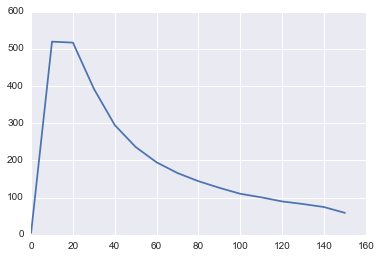

In [149]:
# A2D vs distance graph for comparison with manufacturers
plt.plot(distances, average_readings2)

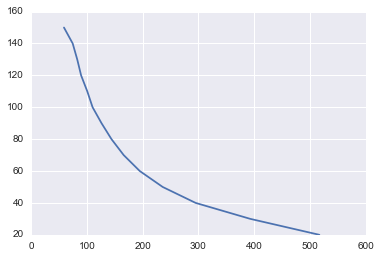

In [150]:
# plot of dependent variable distance against independent variable A2D, exludes distances out of sensor's rated
distances = range(20,160,10)
average_readings2 = average_readings2[2:]
plt.plot(average_readings2, distances)

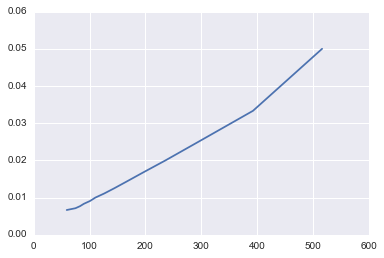

In [151]:
inversed_distances2 = [pow(distance,-1) for distance in distances]
plt.plot(average_readings2, inversed_distances)

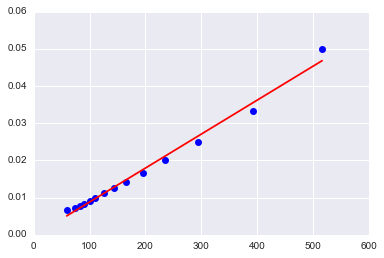

In [152]:
p2 = np.polyfit(average_readings2, inversed_distances2, 1)
plt.plot(average_readings2,inversed_distances2,'bo')
plt.plot(average_readings2,np.polyval(p2,average_readings2),'r')
slope,intercept,r_value,p_value,std_err = stats.linregress(average_readings2,inversed_distances2)

In [153]:
print "R value: ",r_value
print "Slope: ", slope
print "Intercept: ", intercept
print "P value: ", p_value
p2


R value:  0.994011403687
Slope:  9.11607221038e-05
Intercept:  -0.000293911552391
P value:  6.57449637591e-13


array([  9.11607221e-05,  -2.93911552e-04])

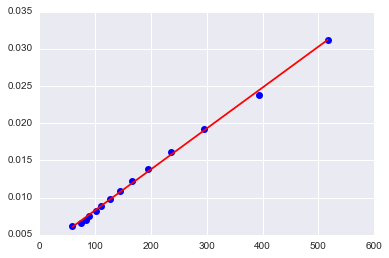

In [154]:
# correction constant k to get a closer fit to the line
inversed_distances2 = [pow(distance+12,-1) for distance in distances]
p2 = np.polyfit(average_readings2, inversed_distances2, 1)
plt.plot(average_readings2,inversed_distances2,'bo')
plt.plot(average_readings2,np.polyval(p2,average_readings2),'r')
slope,intercept,r_value,p_value,std_err = stats.linregress(average_readings2,inversed_distances2)


In [155]:
print "R value: ",r_value
print "Slope: ", slope
print "Intercept: ", intercept
print "P value: ", p_value
p2

R value:  0.999274716356
Slope:  5.49650376444e-05
Intercept:  0.00281529488988
P value:  2.0982838169e-18


array([  5.49650376e-05,   2.81529489e-03])

In [158]:
# equation of line of best fit:
# distance = (1/(0.0000549650376444x + 0.00281529488988 )) - 12
(1/(0.0000549650376444 * 61 + 0.00281529488988 )) - 12

150.12284466825076

In [2]:
(1/(0.0000549650376444 * 100 + 0.00281529488988 )) - 12

108.31090280083444